<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/06-Practica-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Clasificación

En esta notebook resolveremos una práctica de clasificación donde probaremos varios clasificadores, el uso de gridseach. Además, nos enfrentaremos a varios desafios como son el desbalanceo de clases y el tamaño del dataset.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

El siguiente es un datset de Kaggle.

**Contexto**

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pueden obtener las características originales y más información de fondo sobre los datos. Las características $V_1$, $V_2$, ..., $V_{28}$ son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La función 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Cantidad' es la Cantidad de la transacción, esta característica se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.


Recordemos las buenas prácticas del Machine Learning: https://scikit-learn.org/stable/common_pitfalls.html

In [26]:
!wget https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/creditcard.zip

--2024-06-08 02:51:35--  https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/creditcard.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/creditcard.zip [following]
--2024-06-08 02:51:35--  https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/creditcard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66359665 (63M) [application/zip]
Saving to: ‘creditcard.zip.1’

creditcard.zip.1    100%[===================>]  63.29M   200MB/s    in 0.3s    

2024-06-08 02:51:36 (200 MB/s) - ‘creditcard.zip.1’ s

In [27]:
!unzip creditcard.zip

Archive:  creditcard.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [28]:
import pandas as pd

credito = pd.read_csv("creditcard.csv")

In [29]:
credito.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
credito.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


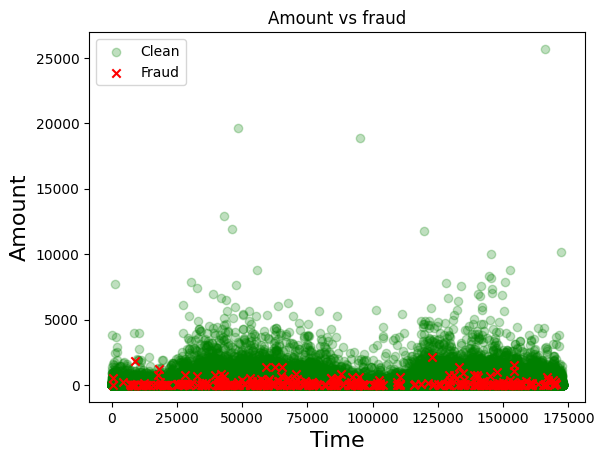

In [31]:
import matplotlib.pyplot as plt

plt.figure()

# Graficamos los que no son fraude
time_amount = credito[credito['Class'] == 0][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1],
            c='green',alpha=0.25,label='Clean')
# Graficamos los que sí son fraude
time_amount = credito[credito['Class'] == 1][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1],
            c='red',label='Fraud',marker='x')
plt.legend(loc='best')
plt.title('Amount vs fraud')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.show()

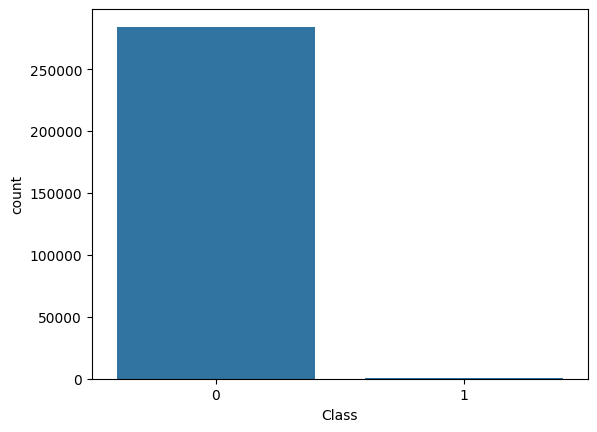

In [32]:
import seaborn as sns

plt.figure()
sns.countplot(x = "Class", data = credito)
plt.show()

In [33]:
import numpy as np

No_of_frauds = credito[credito["Class"]==1].shape[0]
No_of_normals = credito[credito["Class"]==0].shape[0]
print("Hay {} transacciones normales (clase 0)".format(No_of_normals))
print("Hay {} transacciones fraudulentas (clase 1)".format(No_of_frauds))
total = No_of_frauds + No_of_normals
pf= (No_of_frauds / total)*100
pn= (No_of_normals / total)*100
print("Porcentaje clase 0 = {}%".format(np.round(pn,2)))
print("Porcentaje clase 1 = {}%".format(np.round(pf,2)))

Hay 284315 transacciones normales (clase 0)
Hay 492 transacciones fraudulentas (clase 1)
Porcentaje clase 0 = 99.83%
Porcentaje clase 1 = 0.17%


### Submuestro

Se necesita hacer un submuestreo para balancear las clases

* Está claro que la Clase 1 está subrepresentada ya que solo  representa el 0.17% de todo el conjunto de datos.
* Si entrenamos nuestro modelo usando este conjunto de datos, el modelo será ineficiente y será entrenado para predecir solo la Clase 0 porque no tendrá suficientes datos de entrenamiento.
* Podemos obtener una alta exactitud al probar el modelo, pero no debemos confundirnos con esto porque nuestro conjunto de datos no tiene datos de prueba equilibrados. Por lo tanto, tenemos que confiar en el recall que se basa en TP y FP.
* En los casos en que tengamos datos asimétricos, agregar datos adicionales de la característica subrepresentada (sobremuestreo) es una opción, mediante la modelación de la distribución de los datos. Por ahora no tenemos esa opción, así que tendremos que recurrir al submuestreo.
* El submuestreo del conjunto de datos implica mantener todos nuestros datos subrepresentados (Clase 1) mientras se muestrea el mismo número de características de la Clase 0 para crear un nuevo conjunto de datos que comprenda una representación igual de ambas clases.

Obtenemos un conjunto de datos más balanceado que contenga el doble de instancias no fraudulentas respecto a las fraudulentas

In [34]:
# lista los índices de fraude del data set completo
fraud_idxs = credito[credito["Class"]==1].index.to_list()

# lista de índices normales del data set completo
normal_idxs = credito[credito["Class"]==0].index.to_list()

# seleccionamos aleatoriamente el doble de índices de transacciones normales que de normales
random_normal_idxs = np.random.choice(normal_idxs, No_of_frauds*2, replace= False)

# concatenamos los índices fraudulentos y normales y creamos el dataframe sub-sampleado
undersampled_indices = np.concatenate([fraud_idxs, random_normal_idxs])
undersampled_data = credito.iloc[undersampled_indices, :]

print(f"Fraude: {len(fraud_idxs)}, Normales: {len(random_normal_idxs)}")
undersampled_data.head()

Fraude: 492, Normales: 984


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Comprobemos que los datos quedaron balanceados

Número de transacciones normales (clase 0):  984
Número de transacciones fraudulentas (clase 1):  492
Número total de instancias:  1476
Porcentaje clase 0: 66.67
Porcentaje clase 1: 66.67


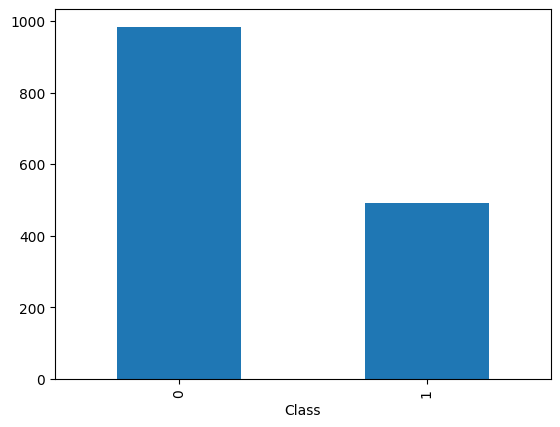

In [35]:
No_of_frauds_sampled = len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("Número de transacciones normales (clase 0): ", No_of_normals_sampled)
print("Número de transacciones fraudulentas (clase 1): ", No_of_frauds_sampled)
total_sampled = No_of_frauds_sampled + No_of_normals_sampled
print("Número total de instancias: ", total_sampled)

Fraud_percent_sampled = (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled = (No_of_normals_sampled / total_sampled)*100
print(f"Porcentaje clase 0: {round(Normal_percent_sampled,2)}")
print(f"Porcentaje clase 1: {round(Normal_percent_sampled,2)}")

count_sampled = pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')
plt.show()

In [36]:
# quitamos las columnas "Time" y "Amount"
undersampled_data.drop(["Time"], axis= 1,inplace=True)

<ipython-input-36-da607f93347b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undersampled_data.drop(["Time"], axis= 1,inplace=True)


### Oversampling

Ahora haremos un proceso llamado [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813)


Para ello necesitamos instalar la librería de _aprendizaje desequilibrado_ ``imbalanced-learn`` de Python

In [37]:
!pip install imbalanced-learn

Podemos imprimir información sobre el módulo

In [38]:
import imblearn
print(imblearn.__version__)

0.10.1


Obtenemos la matriz de datos $X$ y el vector de clases $y$ correspondiente

In [39]:
X = undersampled_data.loc[:, undersampled_data.columns != "Class"].values
y = undersampled_data.loc[:, undersampled_data.columns == "Class"].values

print(f"Matriz de features: {X.shape}")
print(f"Matriz de etiquetas: {y.shape}")

Matriz de features: (1476, 29)
Matriz de etiquetas: (1476, 1)


Hagamos el proceso de sobre-muestreo [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [40]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

Verifiquemos la cantidad de datos ahora

In [41]:
from collections import Counter

print(f"Matriz de features: {X_oversampled.shape}")
print(f"Matriz de etiquetas: {y_oversampled.shape}")

print(Counter(y_oversampled))

Matriz de features: (1968, 29)
Matriz de etiquetas: (1968,)
Counter({1: 984, 0: 984})


### Crear el conjunto de entrenamiento y prueba

Separamos los datos en datos de entrenamiento (75%) y prueba (25%)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled,
                                                    test_size = 0.25,
                                                    random_state = 359)

print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

X_train: 1476
X_test: 492
y_train: 1476
y_test: 492


### Re-escalemos los datos

In [43]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

⭕ Elige una SVM y entrénalo con un conjunto de parámetros de tu elección. Obtener el accuracy usando el método `score` del clasificador.

In [44]:
classifier = SVC(C=1, kernel= 'rbf', random_state=0, gamma='scale')
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.962059620596206

### Prueba el modelo

Realiza las predicciones con el conjunto de prueba y bserva la matriz de confusión.

In [45]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[232   4]
 [ 32 224]]


⭕ Calcula también el *F1-score* y el *precision score*

### Aplica GridSearch para obtener los mejores parámetros para una SVM

In [46]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9552840128263856
The best parameters for using this model is {'C': 1000, 'kernel': 'linear'}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [47]:
classifier_with_best_parameters =  grid_search.best_estimator_

y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred_best_parameters)
print(CM2)

[[231   5]
 [ 27 229]]


⭕ Calcula las métricas de rendimiento: Accuracy, Recall, F1-score, Precision



---



### ⭕ Práctica

La práctica consiste en dos ejercicios:

1. Usa el modelo anterior (**no lo vuelvas a entrenar**) para obtener las predicciones en todos el conjunto de datos original. Reporta las 4 métricas de rendimiento, así como la matriz de confusión. *Hint*: Puedes usar un pipeline para facilitar el proceso.

2. Usa el clasificador lineal OLS con el conjunto de datos entrenamiento balanceado usado en la sesión (el de tamaño 1476). Reporta las 4 métricas de rendimiento, así como la matriz de confusión.

3. Entrena un nuevo clasificador SVM en todo el conjunto sesgado.

    3.1. Separa el conjunto completo en 75% de entrenamiento y 20% de prueba.

    3.2. Entrena un nuevo modelo en este nuevo conjunto de entrenamiento y obten las predicciones en el conjunto de prueba.
    
    3.3 Reporta las 4 métricas de rendimiento, así como la matriz de confusión.
    
    Puedes usar técnicas de re-escalamiento, gridsearch, selección de features. Puedes usar un pipeline para facilitar el proceso.

Redacta una conclusión comparando el desempeño de la parte 1 y la parte 3.



___